In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

In [ ]:
datos = pd.read_csv(filepath_or_buffer='/content/consumo-agua-utm.csv')

In [ ]:
datos.head()

,x,y,consumo_total
0,488174.976929,2.151206e+06,631.00
1,488174.976929,2.151206e+06,115.13
2,488078.391499,2.151257e+06,197.96
3,489035.148918,2.151691e+06,253.53
4,484598.868429,2.153300e+06,839.35


In [ ]:
features_value = datos.values
features_value

array([[4.88174977e+05, 2.15120611e+06, 6.31000000e+02],
       [4.88174977e+05, 2.15120611e+06, 1.15130000e+02],
       [4.88078391e+05, 2.15125700e+06, 1.97960000e+02],
       ...,
       [4.84682471e+05, 2.15044878e+06, 5.69281000e+03],
       [4.85041444e+05, 2.15035935e+06, 9.63150000e+02],
       [4.85333687e+05, 2.15033863e+06, 9.00007000e+03]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia = []
K = range(1,51)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_value)
    inertia.append(km.inertia_)

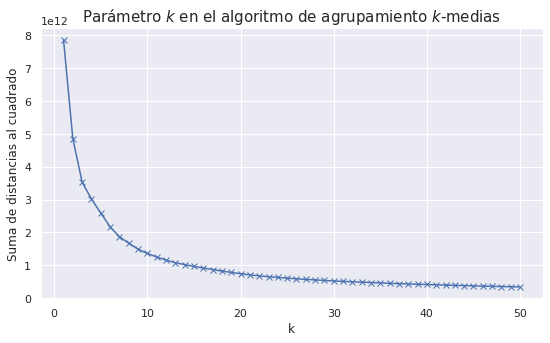

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de distancias al cuadrado')
plt.title('Parámetro $k$ en el algoritmo de agrupamiento $k$-medias', size=15)
plt.savefig("kÓptimo.pdf")
plt.show()

In [ ]:
!pip install --upgrade kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1, 51), inertia, curve='convex', direction='decreasing')
kl.elbow

9

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=123)
kmeans.fit(features_value)
y_kmeans = kmeans.predict(features_value)
y_kmeans

array([4, 4, 4, ..., 7, 7, 7], dtype=int32)

In [ ]:
datos['cluster'] = y_kmeans
datos.head()

,x,y,consumo_total,cluster
0,488174.976929,2.151206e+06,631.00,4
1,488174.976929,2.151206e+06,115.13,4
2,488078.391499,2.151257e+06,197.96,4
3,489035.148918,2.151691e+06,253.53,4
4,484598.868429,2.153300e+06,839.35,4


In [ ]:
centers = np.array(kmeans.cluster_centers_)
centers

array([[4.83014375e+05, 2.14317072e+06, 2.10813021e+03],
       [4.96771066e+05, 2.12933266e+06, 3.26297940e+02],
       [4.85625063e+05, 2.13380502e+06, 1.25169673e+03],
       [4.94649104e+05, 2.13950126e+06, 5.44125527e+02],
       [4.87528833e+05, 2.15501748e+06, 1.06040967e+03],
       [4.81384442e+05, 2.14621907e+06, 4.32482671e+04],
       [4.75252790e+05, 2.13875051e+06, 1.73461323e+03],
       [4.81004015e+05, 2.15112200e+06, 2.56742299e+03],
       [4.89203220e+05, 2.14706960e+06, 1.55282815e+03]])

In [ ]:
centroid = pd.DataFrame(centers)
centroid

,0,1,2
0,483014.374917,2.143171e+06,2108.130209
1,496771.066255,2.129333e+06,326.297940
2,485625.062777,2.133805e+06,1251.696735
3,494649.103520,2.139501e+06,544.125527
4,487528.832760,2.155017e+06,1060.409666
5,481384.441683,2.146219e+06,43248.267099
6,475252.790481,2.138751e+06,1734.613227
7,481004.015210,2.151122e+06,2567.422987
8,489203.220438,2.147070e+06,1552.828145


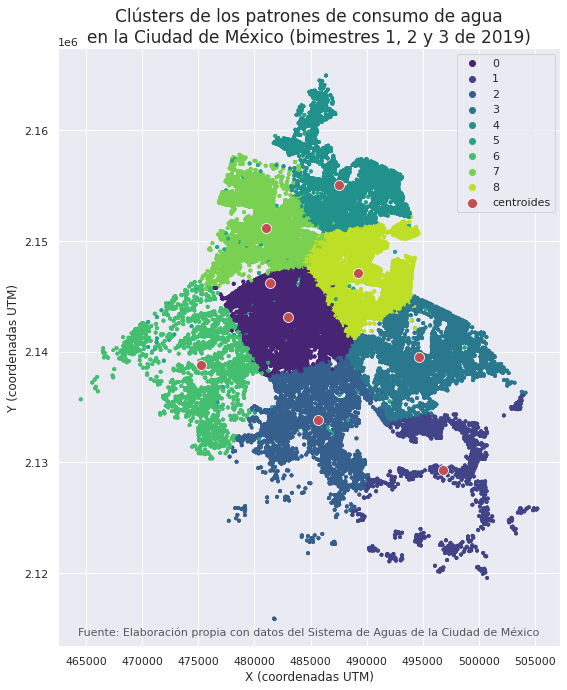

In [104]:
sns.set(rc={"figure.figsize":(9, 11)})
palette = sns.color_palette("viridis", 9)
ax = sns.scatterplot(x=datos['x'],
                y=datos['y'],
                c=datos['cluster'],
                s=15, 
                hue=datos['cluster'],
                palette = palette,
                marker="o",
                edgecolor='none')
sns.scatterplot(x = centers[:,0], 
                y = centers[:,1], 
                marker="o", 
                color='r', 
                s=100, 
                label="centroides")
plt.title("Clústers de los patrones de consumo de agua\nen la Ciudad de México (bimestres 1, 2 y 3 de 2019)", size=17)
ax.set(xlabel="X (coordenadas UTM)", ylabel="Y (coordenadas UTM)")
ax.text(x=0.5, y=0.015, s='Fuente: Elaboración propia con datos del Sistema de Aguas de la Ciudad de México', fontsize=11, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.savefig("clústersConsumoAgua.pdf")
plt.show()